In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
import pandas as pd

df_tamer = pd.read_csv("tamer/logs/episode/eps.csv")
# df_q_1 = pd.read_csv("TAMER/q_500eps_disc1/eps.csv")
# df_q_99 = pd.read_csv("TAMER/q_500eps_disc0.99/eps.csv")
# df_q_95 = pd.read_csv("TAMER/q_500eps_disc0.95/eps.csv")

In [35]:
def get_x_y_axis(df: pd.DataFrame):
    # separate episodes and evals
    episodes = df[df["Ep start ts"] != "eval"]
    evals = df[df["Ep start ts"] == "eval"]

    x_axis_eps = episodes['Episode'].values
    y_axis_eps = episodes['Avg eval reward'].values

    x_axis_eval = evals['Episode'].values
    y_axis_eval = evals['Avg eval reward'].values

    return x_axis_eps, y_axis_eps, x_axis_eval, y_axis_eval

In [36]:
def plot_episodic_rewards(df: pd.DataFrame, title, y_bounds):
    x_axis_eps, y_axis_eps, x_axis_eval, y_axis_eval = get_x_y_axis(df)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    
    # Plot training episode rewards
    axes[0].plot(x_axis_eps, y_axis_eps, label="Episodic rewards")
    axes[0].set_ylim(*y_bounds)
    axes[0].set_xlabel("Episode")
    axes[0].set_ylabel("Reward")
    axes[0].set_title("Episode Rewards")
    axes[0].grid(True)

    # Plot evaluation rewards
    axes[1].plot(x_axis_eval, y_axis_eval, "ro-", label="")
    axes[1].set_ylim(*y_bounds)
    axes[1].set_xlabel("Episode")
    axes[1].set_ylabel("Reward")
    axes[1].set_title("Average Reward (30 Episodes per Checkpoint)")
    axes[1].grid(True)

    fig.suptitle(title, fontsize=14)

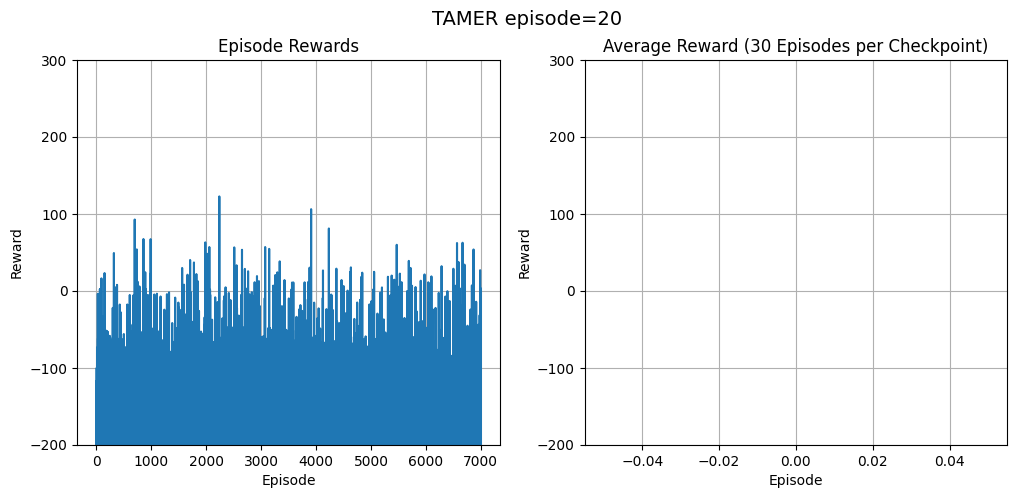

In [39]:
plot_episodic_rewards(df_tamer, "TAMER episode=20", (-200, 300))

In [38]:
plot_episodic_rewards(df_q_1, "Q learning episodes=500 discount=1", (-200, 300))

NameError: name 'df_q_1' is not defined

In [ ]:
def plot_compare_progress(df: pd.DataFrame, df2: pd.DataFrame, title, y_bounds, label1="TAMER", label2="Q Learning"):
    x_axis_eps, y_axis_eps, x_axis_eval, y_axis_eval = get_x_y_axis(df)
    x_axis_eps2, y_axis_eps2, x_axis_eval2, y_axis_eval2 = get_x_y_axis(df2)

    # Normalize episode numbers to percentage
    max_ep1 = max(x_axis_eps)
    max_ep2 = max(x_axis_eps2)

    x_axis_eps = [ep / max_ep1 * 100 for ep in x_axis_eps]
    x_axis_eval = [ep / max_ep1 * 100 for ep in x_axis_eval]

    x_axis_eps2 = [ep / max_ep2 * 100 for ep in x_axis_eps2]
    x_axis_eval2 = [ep / max_ep2 * 100 for ep in x_axis_eval2]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Plot training episode rewards
    axes[0].plot(x_axis_eps, y_axis_eps, label=label1)
    axes[0].plot(x_axis_eps2, y_axis_eps2, label=label2)
    axes[0].set_ylim(*y_bounds)
    axes[0].set_xlabel("Training Progress (%)")
    axes[0].set_ylabel("Reward")
    axes[0].set_title("Episode Rewards")
    axes[0].legend()
    axes[0].grid(True)

    # Plot evaluation rewards
    axes[1].plot(x_axis_eval, y_axis_eval, "ro-", label=label1)
    axes[1].plot(x_axis_eval2, y_axis_eval2, "bo-", label=label2)
    axes[1].set_ylim(*y_bounds)
    axes[1].set_xlabel("Training Progress (%)")
    axes[1].set_ylabel("Reward")
    axes[1].set_title("Average Reward (30 Episodes per Checkpoint)")
    axes[1].legend()
    axes[1].grid(True)

    fig.suptitle(title, fontsize=14)
    plt.show()

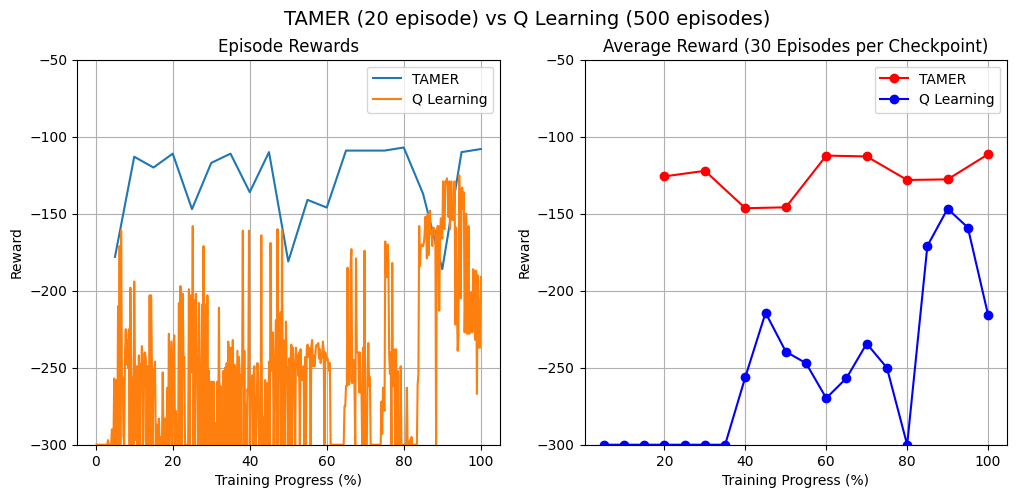

In [ ]:
plot_compare_progress(df_tamer, df_q_1, "TAMER (20 episode) vs Q Learning (500 episodes)", (-200, 300))